In [2]:
import tags
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [3]:
cpu0 = "https://nchqaruntime.cloudapp.net:8080/Historian/v1/ProcessValues?$filter=FQN eq 'Sys.ClientAccessPoint_IN_0.CPU_Usage'"
cpu1 = "https://nchqaruntime.cloudapp.net:8080/Historian/v1/ProcessValues?$filter=FQN eq 'Sys.ClientAccessPoint_IN_1.CPU_Usage'"

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
/projects/sage/sage-6.10/local/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


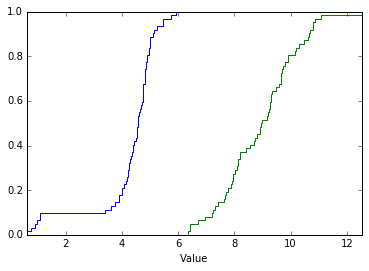

In [4]:
jason = tags.getter(cpu0)
fr = pd.DataFrame(jason['value']).Value
ser = fr.sort_values()
ser[len(ser)] = ser.iloc[-1]
cum_dist = np.linspace(0.,1.,len(ser))
ser_cdf = pd.Series(cum_dist, index=ser)
ser_cdf.plot(drawstyle='steps')
# HAVE I BEEN USING SER INSTEAD OF SER CDF ????????????????????

jason = tags.getter(cpu1)
fr = pd.DataFrame(jason['value']).Value
ser2 = fr.sort_values()
ser2[len(ser2)] = ser2.iloc[-1]
cum_dist = np.linspace(0.,1.,len(ser2))
ser2_cdf = pd.Series(cum_dist, index=ser2)
ser2_cdf.plot(drawstyle='steps')

In [11]:
import analytics as an

print len(ser)
print len(ser2)
an.match_score(ser_cdf, ser2_cdf)

63
63


0.0

In [6]:
def dist(ser):
    dmin = ser[0]
    dmax = ser[len(ser)-1]
    bins = np.linspace(dmin, dmax, 21)
    counts, _ = np.histogram(ser, bins, density = False)
    counts = 1.0 * counts
    counts[counts == 0] = 0.01
    print dmin, dmax
    return counts / sum(counts)

In [7]:
def pdf(ser):
    mu, std = norm.fit(ser)
    dmin = ser[0]
    dmax = ser[len(ser)-1]
    x = np.linspace(dmin, dmax, 100)
    return norm.pdf(x, mu, std)

stats.entropy(pdf(ser), pdf(ser2))

0.17490878868534979

In [8]:
if len(ser) > len(ser2):
    extra = len(ser) - len(ser2)
    ser = ser[extra:]
if len(ser2) > len(ser):
    extra = len(ser2) - len(ser)
    ser2 = ser2[extra:]

k = stats.norm(ser)
l = stats.norm(ser2)
p = dist(ser)
q = dist(ser2)
    
print k, l, stats.entropy(p, q)

3.89694820456 5.907126
8.68269367814 12.53686
<scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8e1d1dc510> <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8e1d1dc410> 0.701569633107


In [9]:
print stats.entropy(q, p)
print stats.entropy(p, q)

0.487028795393
0.701569633107


In [ ]:
jason = tags.getter(cpu0)
fr = pd.DataFrame(jason['value']).Value
ayy = fr.sort_values()
ayy[len(ayy)] = ayy.iloc[-1]
cum_dist = np.linspace(0.,1.,len(ayy))
ayy_cdf = pd.Series(cum_dist, index=ayy)
ayy_cdf.plot(drawstyle='steps')

stats.entropy(pdf(ser), pdf(ayy))
# this is garbage